## Organizing Code for Readability and Reusability: Functions

Whether you're writing code in a jupyter notebook or in a script, eventually your code will get long enough that it becomes a challenge to keep it understandable and easy to find useful pieces to reuse in other projects.

The most common way of organizing code is to break it into into smaller functions. To make a function, you need to tell Python:

- The function's name,
- The inputs (a.k.a "arguments") that the function needs to do its work, and
- The output (a.k.a. "return value") that the function will give to whatever code that called it.

**Example**: Create a function called `add` that adds two numbers and returns the result.

In [ ]:
def add(x, y):   # Define a function name and its arguments x and y
    z = x + y    # Make calculations in the function body
    return z     # "Return" data out of the function.

In [ ]:
result = add(5, 3)  # Then the function can be called again, changing the argument values for whatever you want!

result

**Exercise**: Create a function called `multiply` that multiplies two numbers and returns the result.

In [1]:
def multiply(x,y):
    return x * y

multiply(2,2)

4

**Exercise**: Create a function called `calculate_mean` that takes a list of numbers as input and returns the mean. Please do not use numpy for this :)

In [3]:
def calculate_mean(list):
    value = 0
    for item in list:
        value += item
    return value/len(list)

test = [5,2,4,2,2,3,4,5]
calculate_mean(test)


3.375

---

### Packaging Code into Functions as Refactoring

Because writing functions is often done during a refactoring (reorganizing) process in writing code, let's practice refactoring by taking code that already works and changing it into a function.

**Example**: Make a function out of the code below, so the following line works:
```python
c = subtract(5, 3)`
```

In [ ]:
a = 10
b = 2
result = a - b
result

In [ ]:
def subtract(a, b):
    result = a - b
    return result

c = subtract(5, 3)
c

**Exercise**: Make a function out of the code below, so the following line works:

```python
numbers = [1, 2, 3, 4, 5]
std = calculate_std(numbers)
```

In [4]:
mean = calculate_mean(numbers)
variance = sum([(x - mean) ** 2 for x in numbers]) / len(numbers)
std = variance ** 0.5

NameError: name 'numbers' is not defined

In [6]:
def calculate_variance(list):
    mean = calculate_mean(list)
    return sum([(x - mean) ** 2 for x in list]) / len(list)

def calculate_std(list):
    return calculate_variance(list)**0.5

numbers = [1,2,3,4,5]
std = calculate_std(numbers)
print(std)

1.4142135623730951


**Exercise**: Make a function out of the code below, so the following line works:

```python
numbers = [1, 2, 3, 4, 5]
median = calculate_median(numbers)
```

In [8]:
numbers = [3, 1, 4, 2, 5]

def calculate_median(numbers):
    numbers.sort()
    n = len(numbers)
    mid = n // 2
    if n % 2 == 0:
        median = (numbers[mid - 1] + numbers[mid]) / 2
    else:
        median = numbers[mid]
    return median

median = calculate_median(numbers)

median

3

In [ ]:
# control + . = extract method
# F2 to change variable names everywhere

**Exercise**: Below we have some code to plot a historgram of a numpy array. Can you turn it into a function such that we can use it as `plot_histogram(data, nbins=50)`?

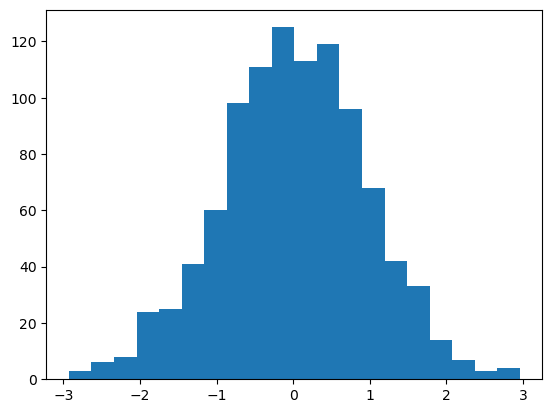

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

def plot_histogram(data, nbins = 20):
    figure, ax = plt.subplots(ncols=1, nrows=1)
    ax.hist(data, bins=nbins);

plot_histogram(data)

---

### Functions with Optional Arguments

**Example**: Create a function that by default converts a temperature value in Celcius to Fahrenheit, but the user can convert it to Kelvin by specifying the corresponding input argument.

In [ ]:
def convert_celcius(temp, to='fahrenheit'):
    if to == 'fahrenheit':
        return temp * 9/5 + 32
    elif to == 'kelvin':
        return temp + 273.15
    else:
        return "Unknown scale"

**Exercise**: Modify the `plot_histogram()` function such that we can optionally also specify the color of the histogram: `plot_histogram(data, nbins=50, color="crimson")`. Default color should be black.

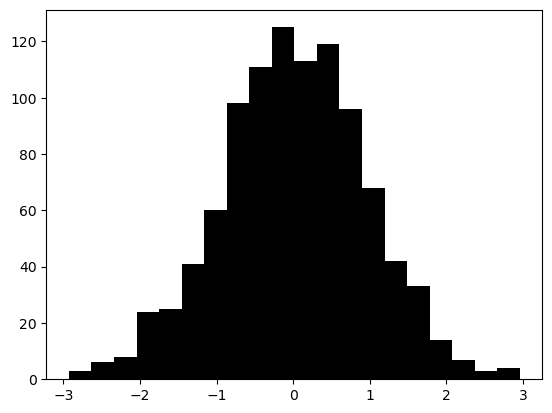

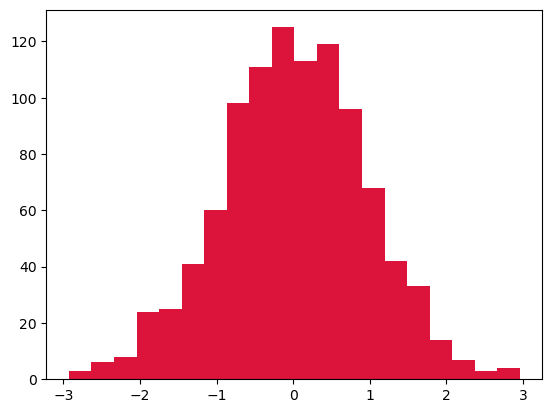

In [5]:
def plot_histogram(data, nbins = 20, color = "black"):
    figure, ax = plt.subplots(ncols=1, nrows=1)
    ax.hist(data, bins=nbins, color = color);

plot_histogram(data)
plot_histogram(data, color = "crimson")

**Exercise**: Create a function, called `compute_stat()`, that by default computes the mean, but when the `kind` argument is specified it can also compute standard deviation or median. Inside this function, make use of the functions you already defined in the previous exercises.

In [ ]:
def compute_stat(data, kind=calculate_mean):
    return kind(data)

# first order functions

**Exercise**: Create a function that by default normalizes the data between 0 and 1, but the user can optionally also specify a lower value and/or and upper value so that the data will be normalized accordingly.

In [ ]:
def normalize(data, min_val = 0, max_val=1):
    # step1
    data_normed = data-data.min()
    data_normed = data_normed/data_normed.max()

    data_normed = data_normed * (max_val-min_val) + min_val
    return data_normed

---

### Function description (i.e. docstring)

When sharing our project with others such that they use the functions we have created, it would be nice to provide some documentation for the function such that the user can just refer to the documentation and get an understanding of how to use it:
- what does the function do on a high level?
- what is each input argument?
- what type should each input argument be?
- what does the function return?
- what is the type of the variable that the function returns?

the description of a function is usually referred to the "docstring" which stands for documentation string.

If we look at commonly used packages such as Numpy and Pandas pretty much all of the methods they have has an extensive docstring. Let's see some examples:

In order to see the docstring we can use the `?` after the function name (without the `()`):

In [ ]:
import numpy as np

In [ ]:
np.max?

In [ ]:
np.clip?

#### How do we create a docstring for our own functions?

While there are several commonly used styles for creating docstrings for functions, the **Google Style** is favored by many for its simplicity and readability. Here is an example:

In [ ]:
def add(num1, num2):
    """Adds two numbers and returns the sum.

    Args:
        num1 (int or float): The first addend.
        num2 (int or float): The second addend.

    Returns:
        int or float: The sum of `num1` and `num2`.
    """
    return num1 + num2


In [ ]:
add?